Import necessary functions and libraries.

In [1]:
import numpy as np, cmath, scipy as sp
import scipy.io
from matplotlib import pyplot as plt

#import basic functions from numpy that we'll need
from numpy import pi, sin, cos, exp, sqrt, log, log10, random, angle, real, imag  
from numpy import zeros, ceil, floor, absolute, linspace
from numpy.fft import fft, ifft
from scipy import signal as sig
from scipy.signal import hilbert


from matplotlib.pyplot import *

%matplotlib inline

Import optional seaborn library for prettier plots.

In [2]:
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

### Figure 14.1

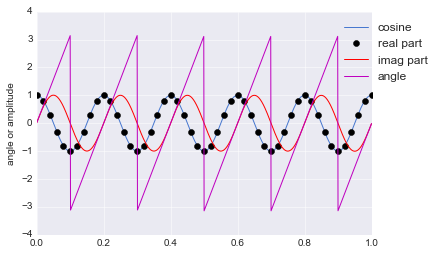

In [3]:
#create cosine
time = np.arange(0,1+0.001,0.001)
cosine = cos(2*pi*5*time)

#plot the signal, and the real & imaginary part of its hilbert transform, and the angle of the analytic signal
plt.plot(time,cosine)
plt.plot(time[::20],real(hilbert(cosine[::20])),'ko') #plot every 20th point bc of overlap
plt.plot(time,imag(hilbert(cosine)),'r')
plt.plot(time,angle(hilbert(cosine)),'m')

plt.ylabel("angle or amplitude")
_=plt.legend(['cosine','real part','imag part','angle'],bbox_to_anchor=[1.2,1])

In [4]:
time[::20].shape, real(hilbert(cosine[::20].shape))

((51,), array([ 51.]))

In [5]:
time[:20].shape, real(hilbert(cosine[:20].shape))

((20,), array([ 20.]))

In [6]:
time.shape, real(hilbert(cosine.shape))

((1001,), array([ 1001.]))

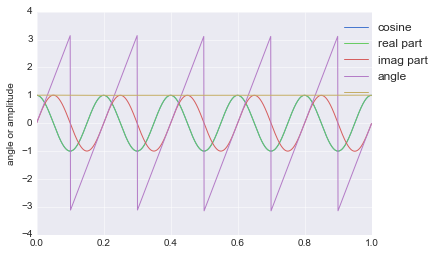

In [7]:
#create cosine
time = np.arange(0,1+0.001,0.001)
cosine = cos(2*pi*5*time)

#plot the signal, and the real & imaginary part of its hilbert transform, and the angle of the analytic signal
plt.plot(time,cosine)
# plt.plot(time[::20],real(hilbert(cosine[::20])))
plt.plot(time,real(hilbert(cosine)))
plt.plot(time,imag(hilbert(cosine)))
plt.plot(time,angle(hilbert(cosine)))
plt.plot(time,absolute(hilbert(cosine)))


plt.ylabel("angle or amplitude")
plt.legend(['cosine','real part','imag part','angle', ''],bbox_to_anchor=[1.2,1])

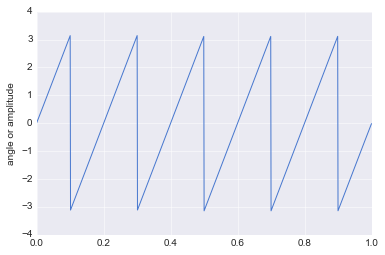

In [8]:
#create cosine
time = np.arange(0,1+0.001,0.001)
cosine = cos(2*pi*5*time)

#plot the signal, and the real & imaginary part of its hilbert transform, and the angle of the analytic signal
# plt.plot(time,cosine)
# plt.plot(time,real(hilbert(cosine)))
# plt.plot(time,imag(hilbert(cosine)))
plt.plot(time,angle(hilbert(cosine)))



plt.ylabel("angle or amplitude")
# plt.legend(['cosine','real part','imag part','angle'],bbox_to_anchor=[1.2,1])

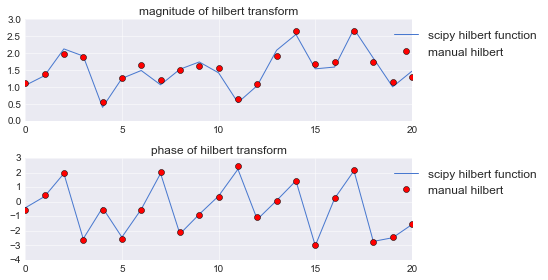

In [10]:
#The FFT-based hilbert transform

#generate random numbers
n = 21
randomnumbers = random.randn(21)

#take FFT
f = fft(randomnumbers)

#create copy that is multiplied by complex operator
complexf = 1j*f

# Original implementation
# #find indices of positive and negatice frequencies
# posF = np.arange(1,floor(n/2.) + (n%2)).astype(int)
# negF = np.arange(ceil(n/2.) + (~n%2),n).astype(int)

# My test
posF = np.arange(1, (n/2) + (n%2)).astype(int)
negF = np.arange((n/2) + (n%2), n).astype(int)


#rotate Fourier coefficients
#note1: this works by computing iAsin(2pft) component, i.e. phase quadrature
#note 2: positive frequencies are rotated counter clockwise, negative frequencies are rotated clockwise

f[posF] = f[posF] + -1j*complexf[posF]
f[negF] = f[negF] +  1j*complexf[negF]

#next two lines are alternative and slightly faster method
#book explains why this is equivalent
# f[posF] = f[posF] * 2
# f[negF] = f[negF] * 0

#take inverse FFT
hilbertx = ifft(f)

#compare with scipy's hilbert function
hilbertm = hilbert(randomnumbers)

#plot results

plt.subplot(211)
plt.plot(absolute(hilbertm))
plt.plot(absolute(hilbertx),'ro')
plt.legend(["scipy hilbert function","manual hilbert"],bbox_to_anchor = [1.35,1])
plt.title("magnitude of hilbert transform")

plt.subplot(212)
plt.plot(angle(hilbertm))
plt.plot(angle(hilbertx),'ro')
plt.legend(["scipy hilbert function","manual hilbert"],bbox_to_anchor = [1.35,1])
plt.title("phase of hilbert transform")

plt.tight_layout()

In [11]:
# generate random numbers
n = 21
randomnumbers = random.randn(n)

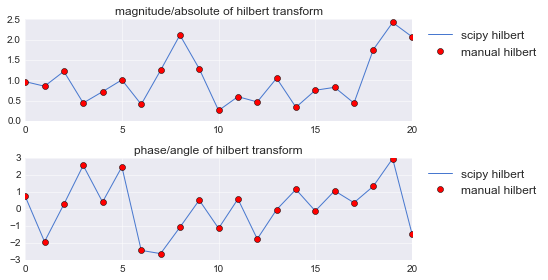

In [12]:
#The FFT-based hilbert transform
#take FFT
f = fft(randomnumbers)

# Manual Hilber impl
#create copy that is multiplied by complex operator
complexf = 1j*f

# test 2
#find indices of positive and negatice frequencies
posF = np.arange(1, floor(n/2) + (n%2)).astype(int)
negF = np.arange(ceil(n/2) + (~n%2), n).astype(int)

#rotate Fourier coefficients
#note1: this works by computing iAsin(2pft) component, i.e. phase quadrature
#note 2: positive frequencies are rotated counter clockwise, negative frequencies are rotated clockwise
f[posF] = f[posF] - (1j*complexf[posF])
f[negF] = f[negF] + (1j*complexf[negF])

#next two lines are alternative and slightly faster method
#book explains why this is equivalent
# f[posF] = f[posF] * 2
# f[negF] = f[negF] * 0

#take inverse FFT
hilbertx = ifft(f)

#compare with scipy's hilbert function
hilbertm = hilbert(randomnumbers)

#plot results
plt.subplot(211)
plt.plot(absolute(hilbertm))
plt.plot(absolute(hilbertx), 'ro')
plt.legend(["scipy hilbert","manual hilbert"],bbox_to_anchor = [1.35,1])
plt.title("magnitude/absolute of hilbert transform")

plt.subplot(212)
plt.plot(angle(hilbertm))
plt.plot(angle(hilbertx), 'ro')
plt.legend(["scipy hilbert","manual hilbert"],bbox_to_anchor = [1.35,1])
plt.title("phase/angle of hilbert transform")

plt.tight_layout()

In [152]:
(~n%2), (n%2), ~(n%2), n, ~1, ~(-1), (~n%3), ~n%2, -22%2, ceil(1.5), floor(1.5)

(0, 1, -2, 21, -2, 0, 2, 0, 0, 2.0, 1.0)

In [13]:
complexf.shape, complexf[0], real(complexf[0]), imag(complexf[0])

((21,), 3.3091152303084672j, array(0.0), array(3.309115230308467))

In [156]:
data = scipy.io.loadmat('sampleEEGdata')
EEGdata = data["EEG"][0,0]["data"]
EEGpnts = data["EEG"][0,0]["pnts"][0,0] #number of points in EEG data
EEGtimes = data["EEG"][0,0]["times"][0]
EEGsrate = float(data["EEG"][0,0]["srate"][0]) #make float for division purposes later
EEGtrials = data["EEG"][0,0]["trials"][0,0]
EEGnbchan = data["EEG"][0,0]["nbchan"][0,0]
EEGchanlocslabels=data["EEG"][0,0]["chanlocs"][0]["labels"]

In [157]:
from firls import firls
#this is a Python firls() implementation taken from
#http://projects.scipy.org/scipy/attachment/ticket/648/designtools.py


/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


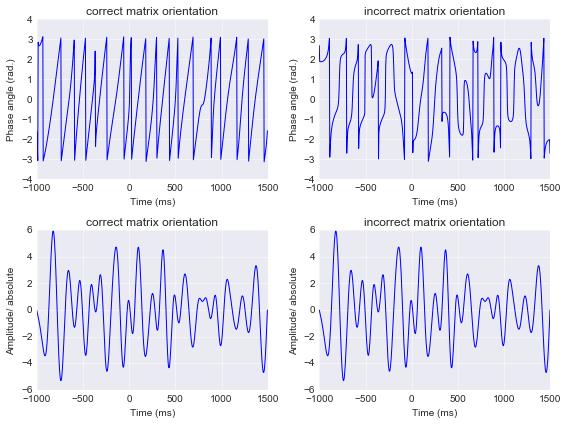

In [158]:
# first, filter data (filter mechanisms will be explained more below; for now, focus on 
# using the phases from the Hilbert transform to test whether the matrix input was correct)


nyquist = EEGsrate/2.
lower_filter_bound = 4. #hz
upper_filter_bound = 10. #hz

transition_width = 0.2
filter_order = np.round(3*EEGsrate/lower_filter_bound)

#create filter shape

ffrequencies = np.array([0, (1-transition_width) * lower_filter_bound, 
                        lower_filter_bound, upper_filter_bound, 
                         (1 + transition_width)* upper_filter_bound, nyquist]) / nyquist

idealresponse = np.array([0,0,1,1,0,0])
filterweights = firls(filter_order,ffrequencies,idealresponse) #use firls script described above

#apply the filter kernal to the data to obtain the band-pass filtered signal
filtered_data = zeros([EEGnbchan,EEGpnts]);

for chani in range(EEGnbchan):
    filtered_data[chani,:] = sig.filtfilt(filterweights,1,EEGdata[chani,:,0])

#  apply hilbert transform in correct and incorrect orientations
hilbert_oops = hilbert(filtered_data, axis=0);
hilbert_yes  = hilbert(filtered_data,axis=1); #compute it along the last axis 

#  Note that the output of the hilbert transform is transposed to bring us back to an electrode X time matrix.
plt.figure(figsize=[8,6])

plt.subplot(221)
plt.plot(EEGtimes,angle(hilbert_yes[0,:]),'b');
plt.title('correct matrix orientation')
plt.xlabel('Time (ms)'), plt.ylabel('Phase angle (rad.)')
gca =plt.gca()
plt.setp(gca,'xlim',[-1000, 1500])

plt.subplot(222)
plt.plot(EEGtimes,angle(hilbert_oops[0,:]),'b');
plt.title('incorrect matrix orientation')
plt.xlabel('Time (ms)'), plt.ylabel('Phase angle (rad.)')
gca =plt.gca()
plt.setp(gca,'xlim',[-1000, 1500])

plt.subplot(223)
plt.plot(EEGtimes,real(hilbert_yes[0,:]),'b');
plt.title('correct matrix orientation')
plt.xlabel('Time (ms)'), plt.ylabel('Amplitude/ absolute')
gca =plt.gca()
plt.setp(gca,'xlim',[-1000, 1500])

plt.subplot(224)
plt.plot(EEGtimes,real(hilbert_oops[0,:]),'b');
plt.title('incorrect matrix orientation')
plt.xlabel('Time (ms)'), plt.ylabel('Amplitude/ absolute')
gca =plt.gca()
plt.setp(gca,'xlim',[-1000, 1500])

plt.tight_layout()

### Figure 14.3

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


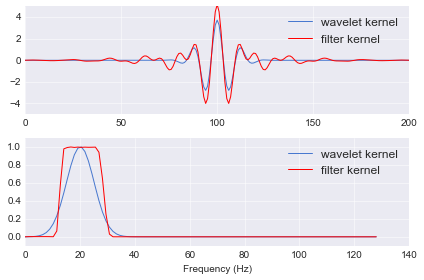

In [160]:
from scipy.stats.mstats import zscore

center_freq = 20 #in hz
filter_frequency_spread = 6 #Hz, +- center frequency
wavelet_frequency_spread = 4

#create wavelet
time = np.arange(-1000/EEGsrate/10.,1000/EEGsrate/10. + 1/EEGsrate,1/EEGsrate)

wavelet = exp(2*1j*pi*center_freq*time) * exp(-time**2/(2*(wavelet_frequency_spread/(2*pi*center_freq))**2))
wavelet = zscore(wavelet)

#compute its power spectrum
fft_wavelet = absolute(fft(wavelet))
fft_wavelet /= np.max(fft_wavelet) #normalized to one for visual comparison case

hz_wavelet = np.linspace(0,nyquist,len(time)/2. + 1) 

#construct filter kernel

transition_width = 0.2

ffrequencies   = np.array([ 0, (1-transition_width)*(center_freq-filter_frequency_spread),
                  (center_freq-filter_frequency_spread),
                  (center_freq+filter_frequency_spread),
                  (1+transition_width)*(center_freq+filter_frequency_spread),
                  nyquist ])/nyquist;

idealresponse = np.array([0,0,1,1,0,0])
filterweights = zscore(firls(200,ffrequencies,idealresponse))

#also compute weights using firwin
filterweights1=zscore(sig.firwin(201,np.array([center_freq-filter_frequency_spread,
                                  center_freq+filter_frequency_spread])/nyquist))

#compute its power spectrum
fft_filtkern = np.absolute(fft(filterweights))
fft_filtkern /=np.max(fft_filtkern) #again normalize to 1 for comparison

fft_filtkern1 = np.absolute(fft(filterweights1))[:-1]
fft_filtkern1 /=np.max(fft_filtkern1)

hz_filtkern = np.linspace(0,nyquist,101) #list of frequencies in hz corresponding to fitler kernel

#plot wavelet and filter kernel
plt.subplot(211)
plt.plot(real(wavelet))
plt.plot(filterweights,'r')
plt.legend(["wavelet kernel","filter kernel"])
plt.setp(plt.gca(),'xlim',[0, 200],'ylim',[-5, 5])

#plot power spectra
plt.subplot(212)
plt.plot(hz_wavelet,fft_wavelet[:int(ceil(len(fft_wavelet)/2.))])
plt.plot(hz_filtkern,fft_filtkern[:int(ceil(len(fft_filtkern)/2.))],'r')
plt.legend(['wavelet kernel','filter kernel'])
plt.setp(plt.gca(),'ylim',[-.1, 1.1])
plt.xlabel('Frequency (Hz)')

plt.tight_layout()


### Figure 14.3

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


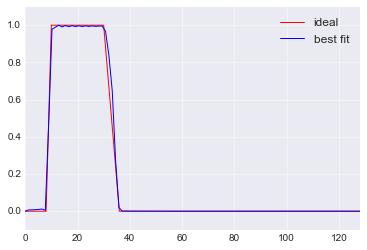

In [161]:
center_freq = 20. #in Hz
filter_frequency_spread_wide = 10 # Hz - center frequency

ffrequencies   = np.array([ 0,
                  (1-transition_width)*(center_freq-filter_frequency_spread_wide),
                  (center_freq-filter_frequency_spread_wide) ,
                  (center_freq+filter_frequency_spread_wide), 
                  (1+transition_width)*(center_freq+filter_frequency_spread_wide) ,
                  nyquist ])/nyquist;

idealresponse = np.array([0,0,1,1,0,0])
filterweightsW = zscore(firls(200,ffrequencies,idealresponse))


plt.plot(ffrequencies*nyquist,idealresponse,'r')


fft_filtkern = absolute(fft(filterweightsW))
fft_filtkern = fft_filtkern/np.max(fft_filtkern) #normalized to 1 for visualization

plt.plot(hz_filtkern,fft_filtkern[:int(ceil(len(fft_filtkern)/2.))],'b')

plt.axis([0,nyquist,-.1,1.1])
_=plt.legend(["ideal",'best fit'])

### Figure 14.5

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


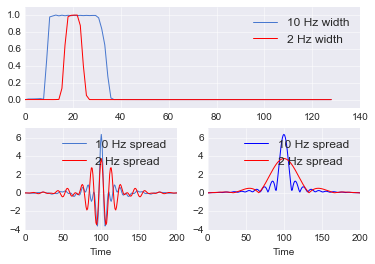

In [163]:

center_freq = 20 # in Hz
filter_frequency_spread_wide = 10 # Hz +/- the center frequency
filter_frequency_spread_naro =  2 # Hz +/- the center frequency


# construct filter kernels
ffrequencies   = np.array([ 0, 
                  (1-transition_width)*(center_freq-filter_frequency_spread_wide), 
                  (center_freq-filter_frequency_spread_wide),
                  (center_freq+filter_frequency_spread_wide),
                  (1+transition_width)*(center_freq+filter_frequency_spread_wide),
                  nyquist ])/nyquist
idealresponse  = np.array([ 0, 0, 1, 1, 0, 0, ])

filterweightsW = zscore(firls(200,ffrequencies,idealresponse))

ffrequencies   = np.array([ 0,
                  (1-transition_width)*(center_freq-filter_frequency_spread_naro),
                  (center_freq-filter_frequency_spread_naro),
                  (center_freq+filter_frequency_spread_naro),
                  (1+transition_width)*(center_freq+filter_frequency_spread_naro),
                  nyquist ])/nyquist;

filterweightsN = zscore(firls(200,ffrequencies,idealresponse))


plt.subplot(211)
fft_filtkern  = absolute(fft(filterweightsW))
fft_filtkern  = fft_filtkern/np.max(fft_filtkern) # normalized to 1.0 for visual comparison ease
plt.plot(hz_filtkern,fft_filtkern[:int(ceil(len(fft_filtkern)/2.))])

fft_filtkern  = absolute(fft(filterweightsN))
fft_filtkern  = fft_filtkern/np.max(fft_filtkern)# normalized to 1.0 for visual comparison ease
plt.plot(hz_filtkern,fft_filtkern[:int(ceil(len(fft_filtkern)/2.))],'r')
plt.setp(plt.gca(),'ylim',[-.1 ,1.1])
_=plt.legend(['10 Hz width','2 Hz width'])

plt.subplot(223)
plt.plot(filterweightsW)
plt.plot(filterweightsN,'r')
plt.setp(plt.gca(),'xlim',[0 ,200],'ylim',[-4 ,7])
plt.legend(['10 Hz spread','2 Hz spread'])
plt.xlabel('Time')

plt.subplot(224)
plt.plot(absolute(hilbert(filterweightsW)),'b')
plt.plot(absolute(hilbert(filterweightsN)),'r')
plt.setp(plt.gca(),'xlim',[0, 200],'ylim',[-4 ,7])
plt.legend(['10 Hz spread','2 Hz spread'])
_=plt.xlabel('Time')

### Figure 14.6

Relies on fir1() in matlab. I dont think there is an equivalent in scipy. I tried using scipy.firwin(), but the results don't seem to look the same. add this to the TODO.

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


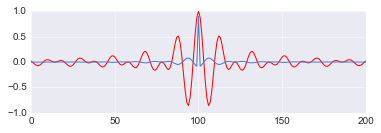

In [133]:
plt.subplot(211)


freqL = center_freq-filter_frequency_spread
freqU = center_freq+filter_frequency_spread

ffrequencies   =np.array( [ 0 ,freqL, freqL ,freqU, freqU ,nyquist ])/nyquist #transition zone of 0
filterweights  = firls(200,ffrequencies,idealresponse);
filterweights1 =  sig.firwin(201,np.array([freqL, freqU])/nyquist);


#plot wavelet and filter kernel
plt.plot(filterweights/np.max(filterweights),'r')
plt.plot(filterweights1)



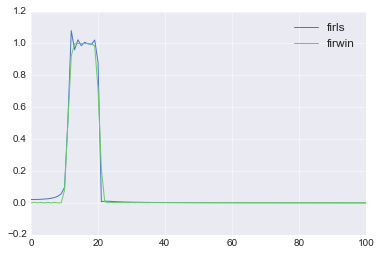

In [135]:


# plt.plot(sig.firwin2(200,np.array([0,freqL,freqL, freqU,freqU,nyquist])/nyquist,[0,0,1,1,0,0],window=("hamming")))
fft_filterweights1=1- absolute(fft(filterweights1))
fft_filterweights = absolute(fft(filterweights))

plt.plot(fft_filterweights[:int(ceil(len(filterweights)/2.))])
plt.plot(fft_filterweights1[:int(ceil(len(filterweights1)/2.))])

plt.legend(["firls","firwin"])

### Figure 14.7

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


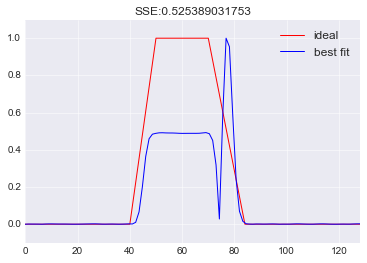

In [136]:
center_freq = 60. #in Hz
filter_frequency_spread_wide = 10 #Hz +- center frequency

ffrequencies = np.array([ 0,
                  (1-transition_width)*(center_freq-filter_frequency_spread_wide),
                  (center_freq-filter_frequency_spread_wide),
                  (center_freq+filter_frequency_spread_wide),
                  (1+transition_width)*(center_freq+filter_frequency_spread_wide),
                  nyquist ])/nyquist

idealresponse  = np.array([ 0, 0, 1 ,1, 0, 0 ])
filterweightsW = zscore(firls(200,ffrequencies,idealresponse))

plt.plot(ffrequencies*nyquist,idealresponse,'r')

fft_filtkern= absolute(fft(filterweightsW))
fft_filtkern = fft_filtkern/np.max(fft_filtkern) #normalized to 1 for visual comparison
plt.plot(hz_filtkern,fft_filtkern[:int(ceil(len(fft_filtkern)/2.))],'b')

plt.setp(plt.gca(),'ylim',[-.1,1.1],'xlim',[0, nyquist])
plt.legend(('ideal','best fit'))

#to replace the use of Matlab's dsearchn() function

def closest(X, p):
    disp = X - p
    return np.argmin((disp*disp))

freqsidx = [closest(hz_filtkern,x) for x in ffrequencies*nyquist]

plt.title("SSE:" + str(np.sum((idealresponse-fft_filtkern[freqsidx])**2)))


/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


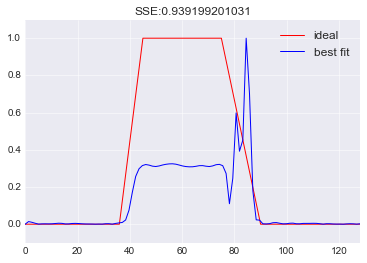

In [137]:
center_freq = 60 #in Hz
filter_frequency_spread_wide = 15 #Hz +-center frequency

ffrequencies = np.array([0,
                        (1-transition_width)*(center_freq-filter_frequency_spread_wide),
                        (center_freq - filter_frequency_spread_wide),
                        (center_freq+filter_frequency_spread_wide),
                        (1+transition_width)*(center_freq+filter_frequency_spread_wide),
                        nyquist])/nyquist

idealresponse  = np.array([ 0, 0, 1 ,1, 0, 0 ])
filterweightsW = zscore(firls(200,ffrequencies,idealresponse))

plt.plot(ffrequencies*nyquist,idealresponse,'r')

fft_filtkern= absolute(fft(filterweightsW))
fft_filtkern = fft_filtkern/np.max(fft_filtkern) #normalized to 1 for visual comparison
plt.plot(hz_filtkern,fft_filtkern[:int(ceil(len(fft_filtkern)/2.))],'b')

plt.setp(plt.gca(),'ylim',[-.1,1.1],'xlim',[0, nyquist])
plt.legend(('ideal','best fit'))

freqsidx = [closest(hz_filtkern,x) for x in ffrequencies*nyquist]

_=plt.title("SSE:" + str(np.sum((idealresponse-fft_filtkern[freqsidx])**2)))

### Figure 14.8

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


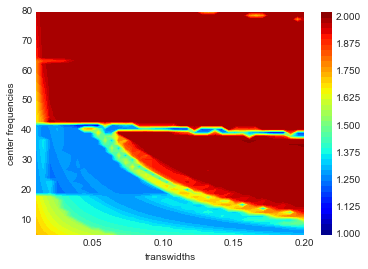

In [139]:

centerfreqs  = linspace(5,80,60);
transwidths  = linspace(0.01,0.2,40);
filterwidths = linspace(0.05,0.3,40);

sse = zeros((len(centerfreqs),len(transwidths)))
for centfreqi in range(len(centerfreqs)):
    
    center_freq = centerfreqs[centfreqi]
    
    for transwidi in range(len(transwidths)):
        
        filter_frequency_spread_wide = center_freq*2
        transition_width = transwidths[transwidi]
        
        ffrequencies   = np.array([ 0,
                          (1-transition_width)*(center_freq-filter_frequency_spread_wide),
                          (center_freq-filter_frequency_spread_wide),
                          (center_freq+filter_frequency_spread_wide),
                          (1+transition_width)*(center_freq+filter_frequency_spread_wide),
                          nyquist ])/nyquist;
        filterweightsW = zscore(firls(200,ffrequencies,idealresponse))
        
        fft_filtkern   = absolute(fft(filterweightsW))
        fft_filtkern   = fft_filtkern/np.max(fft_filtkern) # normalized to 1.0 for visual comparison ease
        
        freqsidx = [closest(hz_filtkern,x) for x in ffrequencies*nyquist]
        
        sse[centfreqi,transwidi] = np.sum( (idealresponse-fft_filtkern[freqsidx])**2 )


contourf(transwidths,centerfreqs, sse, 40,
                cmap=cm.jet,
                )
xlabel('transwidths'), ylabel('center frequencies')
colorbar()

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


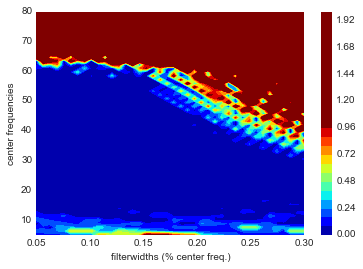

In [141]:
sse = zeros((len(centerfreqs),len(transwidths)));

for centfreqi in range(len(centerfreqs)):
    center_freq = centerfreqs[centfreqi]
    
    for transwidi in range(len(transwidths)):
        filter_frequency_spread_wide = center_freq*filterwidths[transwidi]
        transition_width = .2
        
        ffrequencies   = np.array([ 0,
                          (1-transition_width)*(center_freq-filter_frequency_spread_wide),
                          (center_freq-filter_frequency_spread_wide),
                          (center_freq+filter_frequency_spread_wide),
                          (1+transition_width)*(center_freq+filter_frequency_spread_wide),
                          nyquist ])/nyquist
        
        filterweightsW = zscore(firls(200,ffrequencies,idealresponse));

        fft_filtkern  = absolute(fft(filterweightsW));
        fft_filtkern  = fft_filtkern/np.max(fft_filtkern) # normalized to 1.0 for visual comparison ease
        
        freqsidx = [closest(hz_filtkern,x) for x in ffrequencies*nyquist]
        sse[centfreqi,transwidi] = np.sum( (idealresponse-fft_filtkern[freqsidx])**2)
        
        
contourf(filterwidths,centerfreqs,sse,30,cmap = cm.jet)
xlabel('filterwidths (% center freq.)') 
ylabel('center frequencies')
colorbar()
clim([0,1])

### Figure 14.8

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


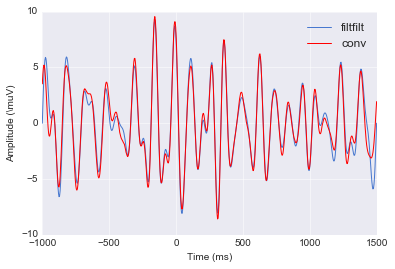

In [142]:

center_freq   = 10.
freqspread    = 4. #  Hz +/- the center frequency
transwid      = .10
ffrequencies  = np.array([ 0,
                          (1-transwid)*(center_freq-freqspread),
                          (center_freq-freqspread),
                          (center_freq+freqspread),
                          (1+transwid)*(center_freq+freqspread),
                          nyquist ])/nyquist

data2filter   = np.squeeze(EEGdata[46,:,0])
filterweights = firls(200,ffrequencies,idealresponse) # recompute without z-scoring

filter_result = sig.filtfilt(filterweights,1,data2filter)
convol_result = np.convolve(data2filter,filterweights,'same')# could also use ifft(fft(data2filter...


plot(EEGtimes,filter_result)
plot(EEGtimes,convol_result,'r')
# setp(gca(),'xlim',[-200, 1000]) # zoom-in
xlabel('Time (ms)'), ylabel('Amplitude (\muV)')
_=legend(['filtfilt','conv'])


### Figure 14.9

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


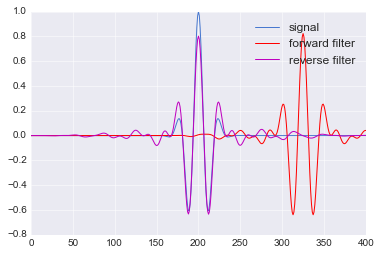

In [143]:

center_freq = 10 # in Hz
nyquist     = EEGsrate/2.;

# create short sine wave
time    = np.arange(-2000./EEGsrate/10.,2000./EEGsrate/10. + 1/EEGsrate,1/EEGsrate)
wavelet = cos(2*pi*center_freq*time) * exp(-time**2/(2*(3/(2*pi*center_freq))**2));


freqspread = 4. # Hz +/- the center frequency
transwid   = .10

# construct filter kernels
ffrequencies  = np.array([ 0 ,
                 (1-transwid)*(center_freq-freqspread),
                 (center_freq-freqspread) ,
                 (center_freq+freqspread),
                 (1+transwid)*(center_freq+freqspread),
                 nyquist ])/nyquist;
idealresponse = np.array([ 0 ,0 ,1, 1, 0, 0 ])
filterweights = firls(250,ffrequencies,idealresponse);


forward_filt = sig.lfilter(filterweights,1,wavelet)
reverse_filt = sig.lfilter(filterweights,1,forward_filt[::-1])
final_filt_result = reverse_filt[::-1] # must reverse time again!

plot(wavelet)
plot(forward_filt,'r')
plot(reverse_filt,'m')

# setp(gca(),'xlim',[0, len(wavelet)])
legend(['signal','forward filter','reverse filter'])

### Figure 14.10

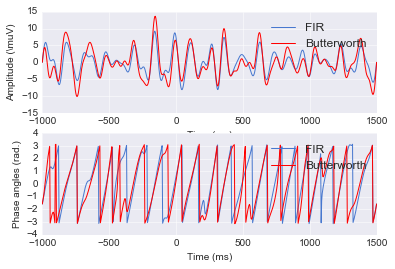

In [144]:

butterB,butterA = sig.butter(4,np.array([(center_freq-filter_frequency_spread),
                                         (center_freq+filter_frequency_spread)])/nyquist,btype='bandpass');
butter_filter = sig.filtfilt(butterB,butterA,data2filter,padlen=150);


subplot(211)

#plot real part of the filtered signal
plot(EEGtimes,filter_result)
plot(EEGtimes,butter_filter,'r')
# setp(gca(),'xlim',[-200, 1000])
xlabel('Time (ms)'), ylabel('Amplitude (\muV)');
legend(['FIR','Butterworth'])

# now plot phases
subplot(212)
plot(EEGtimes,angle(hilbert(filter_result)))
plot(EEGtimes,angle(hilbert(butter_filter)),'r')
# setp(gca(),'xlim',[-200, 1000])
xlabel('Time (ms)'), ylabel('Phase angles (rad.)');
_=legend(['FIR','Butterworth'])


### 14.12

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q = toeplitz(q[:M+1]) + hankel(q[:M+1], q[M : ])
/Users/arasdar/arasdar-DL-git/uri-bci-ref/firls.py:90: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = append(1, 1.0/i1) * array(mat(kron (cos_ints2, [1, 1]) + cos_ints[:M+1,:]) * mat(d).T)[:,0]


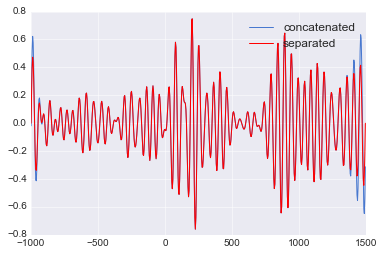

In [145]:
from time import time
elap_time = np.array([0., 0.])
num_iter  = 100


freqspread  =  4 # Hz +/- the center frequency
center_freq = 20.
transwid    = .15

#construct filter kernels
ffrequencies  = np.array([ 0,
                          (1-transwid)*(center_freq-freqspread),
                          (center_freq-freqspread) ,
                          (center_freq+freqspread) ,
                          (1+transwid)*(center_freq+freqspread) ,
                          nyquist ])/nyquist
idealresponse = np.array([ 0 ,0 ,1 ,1, 0 ,0 ])

filterweights = firls(3*np.round(EEGsrate/(center_freq-freqspread)),ffrequencies,idealresponse)


for i in range(num_iter):
    tic = time()
    data2filter_cat = np.squeeze(np.reshape(EEGdata[46,:,:],(1,EEGpnts*EEGtrials),order="F"))
    filtdat_cat = np.reshape(sig.filtfilt(filterweights,1,data2filter_cat),(EEGpnts,EEGtrials),order="F")
    elap_time[0] = elap_time[0] +( time() -tic)


for i in range(num_iter):
    tic = time()
    data2filter_sep = np.squeeze((EEGdata[46,:,:]))
    filtdat_sep = zeros(data2filter_sep.shape)
    for triali in range(EEGtrials):
        filtdat_sep[:,triali] = sig.filtfilt(filterweights,1,data2filter_sep[:,triali])
    
    elap_time[1] = elap_time[1] + (time() - tic)


elap_time = elap_time/num_iter

# plot
plot(EEGtimes,np.mean(filtdat_cat,axis=1))
plot(EEGtimes,np.mean(filtdat_sep,axis=1),'r')
legend(['concatenated','separated'])


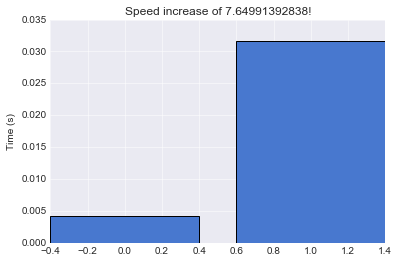

In [146]:
figure
bar([-.4,.6],elap_time)
# setp(gca(),'xlim',[-1,2],'xticks',[0,1],'xticklabels',['Concatenated','Separated'])
ylabel('Time (s)')
_=title( 'Speed increase of ' + str(elap_time[1]/elap_time[0]) + '!' )